In [90]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Load Data

In [91]:
df = pd.read_excel('sample_-_superstore.xls')

In [92]:
print(df.shape)
df.head()

(9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Clean & Organize Data

In [93]:
# Filter Dataframe to datetime, sales and profits

df_ts = df[['Order Date', 'Sales', 'Profit']]
df_ts.head()

,Order Date,Sales,Profit
0,2016-11-08,261.9600,41.9136
1,2016-11-08,731.9400,219.5820
2,2016-06-12,14.6200,6.8714
3,2015-10-11,957.5775,-383.0310
4,2015-10-11,22.3680,2.5164


In [94]:
from datetime import datetime

# Convert Order Date column to datetime

df_ts['Order Date'] = pd.to_datetime(df['Order Date'])
print(type(df_ts['Order Date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_61865/1320109393.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts['Order Date'] = pd.to_datetime(df['Order Date'])


In [95]:
# Set Datetime as index

df_ts.set_index('Order Date', inplace=True)

<AxesSubplot: xlabel='Order Date'>

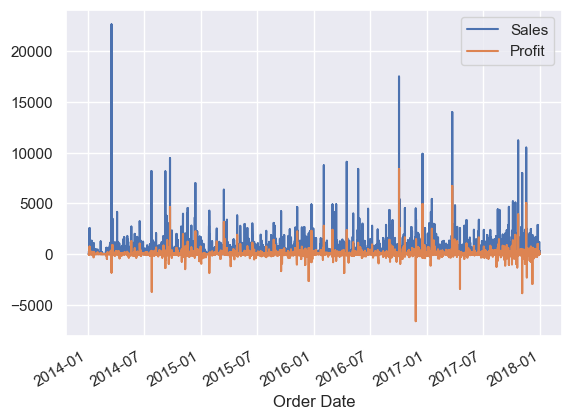

In [96]:
# Plot Sales

df_ts.plot()

In [97]:
# Sort the datetime index in ascending order

df_ts.sort_index(ascending=True, inplace=True)

/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_61865/3479530672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts.sort_index(ascending=True, inplace=True)


In [98]:
# Feature Engineer costs from Sales (Revenue) and Profits

df_ts['Cost'] = df_ts.Sales - df_ts.Profit

/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_61865/1080854531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts['Cost'] = df_ts.Sales - df_ts.Profit


In [99]:
# Reset Index to group unique Order Dates

df_ts.reset_index(inplace=True)

In [100]:
# Group by Order Dates and sum all Sales, Profits and Costs for each unique Date

df_ts = df_ts.groupby('Order Date').sum()
df_ts

,Sales,Profit,Cost
Order Date,,,
2014-01-03,16.4480,5.5512,10.8968
2014-01-04,288.0600,-65.9901,354.0501
2014-01-05,19.5360,4.8840,14.6520
2014-01-06,4407.1000,1358.0524,3049.0476
2014-01-07,87.1580,-71.9621,159.1201
...,...,...,...
2017-12-26,814.5940,61.1202,753.4738
2017-12-27,177.6360,-31.9742,209.6102
2017-12-28,1657.3508,253.1188,1404.2320


<AxesSubplot: xlabel='Sales', ylabel='Count'>

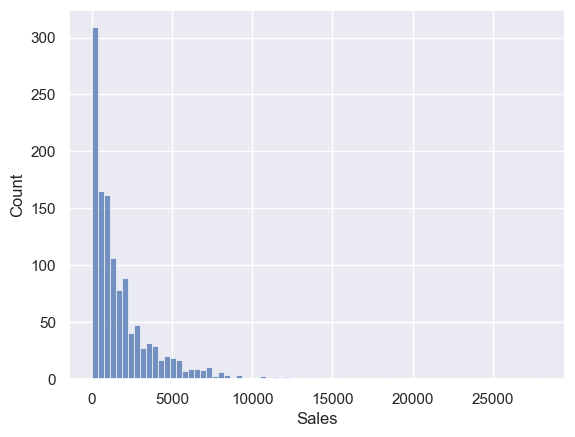

In [102]:
sns.histplot(x=df_ts['Sales'])

<AxesSubplot: xlabel='Cost', ylabel='Count'>

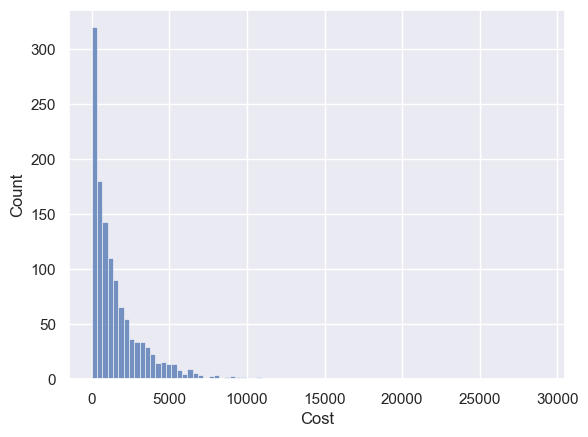

In [103]:
sns.histplot(x=df_ts['Cost'])

<AxesSubplot: xlabel='Profit', ylabel='Count'>

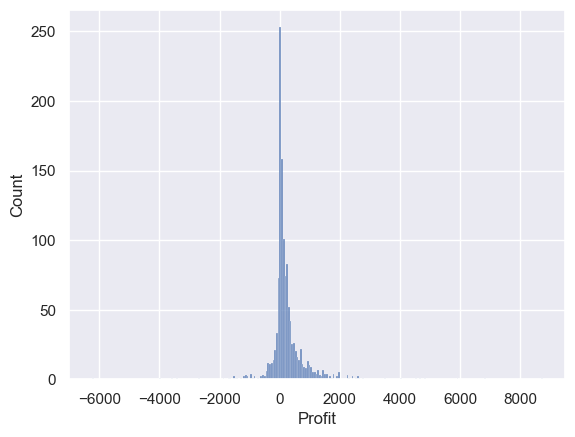

In [104]:
sns.histplot(x=df_ts['Profit'])

<AxesSubplot: xlabel='Order Date'>

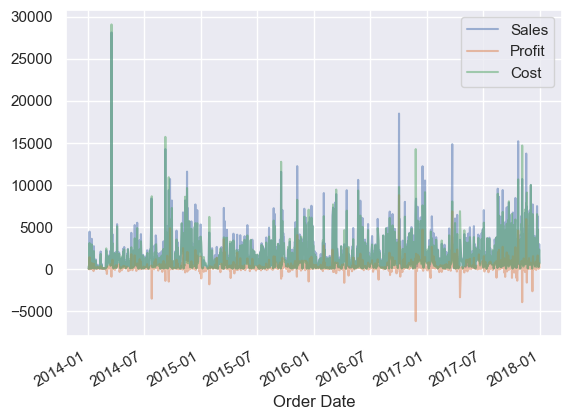

In [101]:
df_ts.plot(alpha=0.5, style='-')

## Moving Average as Data Preparation

Order Date
2014-01-03            NaN
2014-01-04            NaN
2014-01-05            NaN
2014-01-06            NaN
2014-01-07            NaN
2014-01-09            NaN
2014-01-10     701.953714
2014-01-11     701.024000
2014-01-13    1167.557571
2014-01-14    1173.618143
Name: Sales, dtype: float64


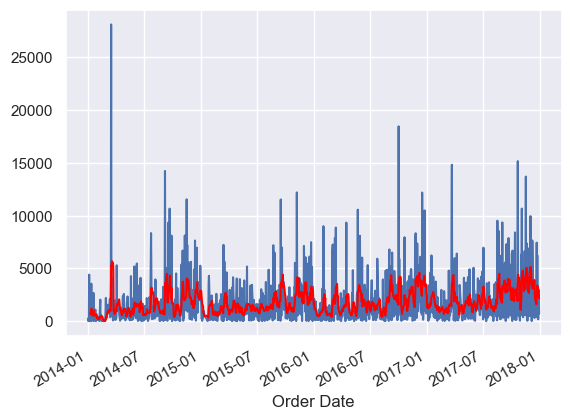

In [79]:
# Tail-rolling average transform

sales_series = df_ts['Sales']

sales_rolling = sales_series.rolling(window=7)
rolling_mean = sales_rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
sales_series.plot()
rolling_mean.plot(color='red')
plt.show()

## Test for Stationarity

In [114]:
from statsmodels.tsa.stattools import adfuller

In [144]:
def ADF_Stationarity_Test(ts, a):
    X = sales_series_M.values
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] < a:
        print('This series is stationary')
    else:
        print('This series is non-stationary.')
    return

In [116]:
ADF_Stationarity_Test(sales_series, 0.05)

ADF Statistic: -5.839521
p-value: 0.000000
This series is stationary


## Decomposing Sales

In [117]:
from statsmodels.tsa.seasonal import seasonal_decompose

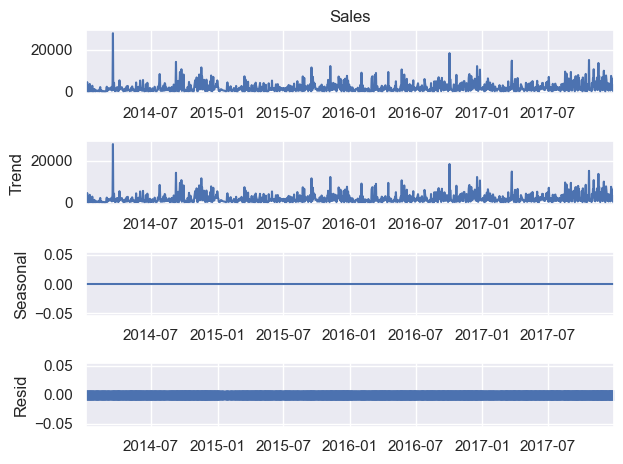

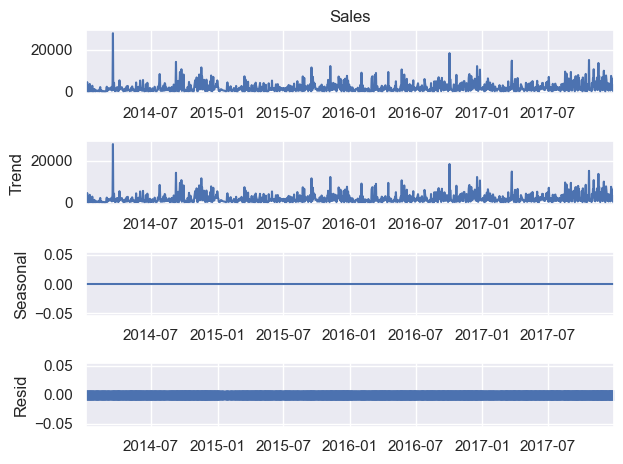

In [125]:
result = seasonal_decompose(sales_series, model='additive', period=1)
result.plot()

## Re-adjusting the timeseries analysis

In [129]:
df_ts.reset_index(inplace=True)

In [136]:
# Group Dataframe by month

df_ts = df_ts.resample(rule='M', on='Order Date').sum()

<AxesSubplot: xlabel='Order Date'>

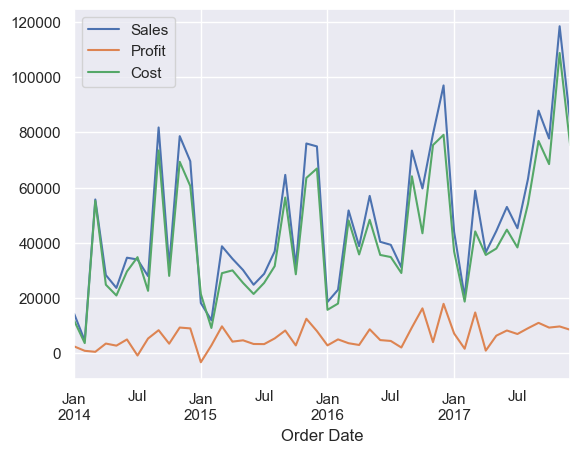

In [137]:
df_ts.plot()

Order Date
2014-01-31             NaN
2014-02-28             NaN
2014-03-31    24815.932000
2014-04-30    29502.082000
2014-05-31    35878.213667
2014-06-30    28846.253200
2014-07-31    30729.935867
2014-08-31    32150.329700
2014-09-30    47877.737433
2014-10-31    47046.737433
Freq: M, Name: Sales, dtype: float64


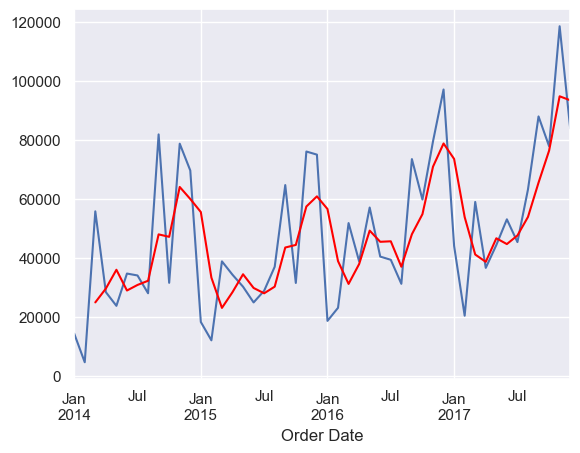

In [140]:
# Tail-rolling average transform

sales_series_M = df_ts['Sales']

sales_rolling = sales_series_M.rolling(window=3)
rolling_mean = sales_rolling.mean()
print(rolling_mean.head(10))

# plot original and transformed dataset

sales_series_M.plot()
rolling_mean.plot(color='red')
plt.show()

In [145]:
# Test if monthly Sales data is Stationary

ADF_Stationarity_Test(sales_series_M, 0.05)

ADF Statistic: -4.493768
p-value: 0.000202
This series is stationary


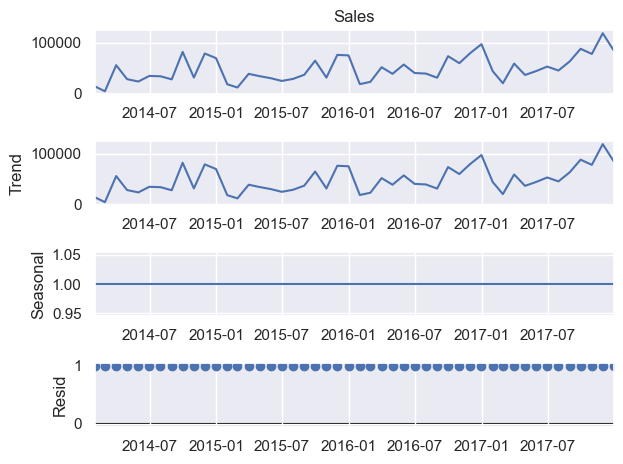

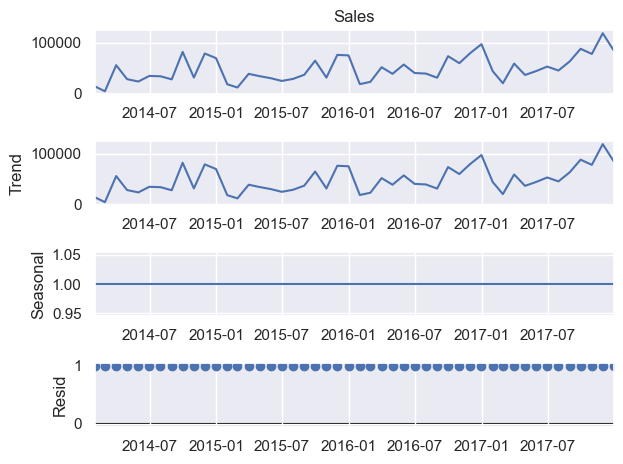

In [143]:
# Decomposing sales data as organized by month

result = seasonal_decompose(sales_series_M, model='multiplicative', period=1)
result.plot()

## Evaluating and forecasting with Box Jenkins Method

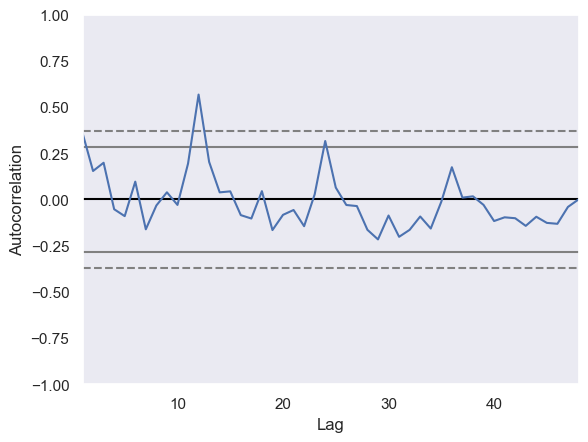

In [146]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(sales_series_M)
plt.show()

## Fit Arima Model

In [184]:
from statsmodels.tsa.arima.model import ARIMA

# fit model

model = ARIMA(sales_series_M, order=(5,0,0))
model_fit = model.fit()

In [185]:
# Print summary of fit model

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(5, 0, 0)   Log Likelihood                -548.686
Date:                Sun, 29 Jan 2023   AIC                           1111.371
Time:                        13:39:37   BIC                           1124.470
Sample:                    01-31-2014   HQIC                          1116.321
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.786e+04   6945.769      6.890      0.000    3.42e+04    6.15e+04
ar.L1          0.3613      0.161      2.250      0.024       0.047       0.676
ar.L2          0.0429      0.174      0.247      0.8

<AxesSubplot: xlabel='Order Date'>

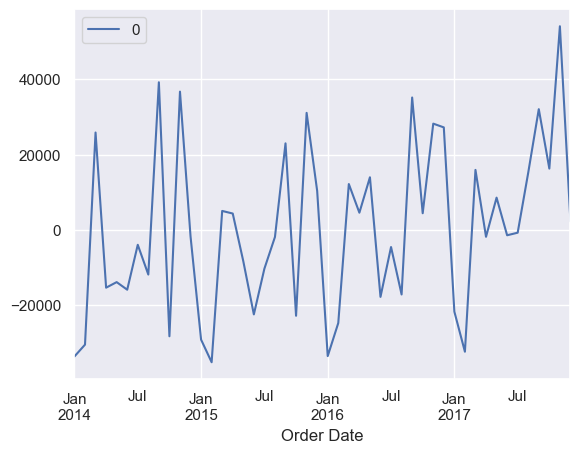

In [186]:
# Plot the residuals

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

<AxesSubplot: ylabel='Density'>

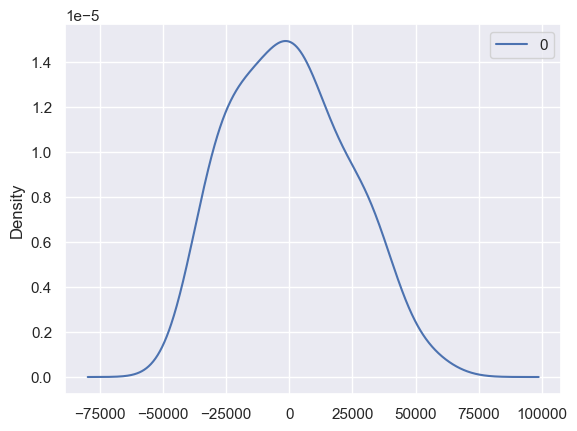

In [187]:
# Density plot of residuals

residuals.plot(kind='kde')

In [188]:
# Print a summary of stats for the residuals

residuals.describe()

,0
count,48.000000
mean,93.224683
std,22600.522834
min,-35155.513973
25%,-17314.893013
50%,-1573.289676
75%,15373.556180
max,54066.836355


There is a bias in the prediction as there is a non-zero mean in the residuals

## Forecasting with ARIMA model

In [190]:
from sklearn.metrics import mean_squared_error
from math import sqrt

predicted=50736.751724, expected=31115.374300
predicted=44915.212413, expected=73410.024900
predicted=51926.776546, expected=59687.745000
predicted=66284.017647, expected=79411.965800
predicted=72794.195963, expected=96999.043000
predicted=98956.576604, expected=43971.374000
predicted=68653.005244, expected=20301.133400
predicted=53485.098562, expected=58872.352800
predicted=36088.990856, expected=36521.536100
predicted=35231.988557, expected=44261.110200
predicted=47720.794364, expected=52981.725700
predicted=21256.392574, expected=45264.416000
predicted=37578.042114, expected=63120.888000
predicted=78374.387001, expected=87866.652000
predicted=73357.354214, expected=77776.923200
predicted=89071.373841, expected=118447.825000
predicted=123987.615182, expected=83829.318800
Test RMSE: 25815.196


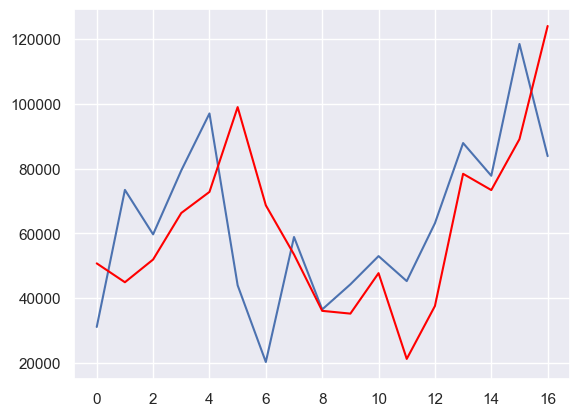

In [200]:
# split into train and test sets

X = sales_series_M.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation

for t in range(len(test)):
 model = ARIMA(history, order=(5,2,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
    
# evaluate forecasts

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## Defining an Arima Evaluation Function

In [203]:
# evaluate an ARIMA model for a given order (p,d,q)

def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

## Creating a Gridsearch function for Arima Timeseries

In [204]:
import warnings

warnings.filterwarnings("ignore")

In [212]:
# evaluate combinations of p, d and q values for an ARIMA model

def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
    try:
        mse = evaluate_arima_model(dataset, order)
        if mse < best_score:
            best_score, best_cfg = mse, order
            print('ARIMA%s MSE=%.3f' % (order,mse))
    except error as e:
        print(e)
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [214]:
# evaluate parameters

p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(sales_series_M.values, p_values, d_values, q_values)

ARIMA(10, 2, 2) MSE=539100512.089
Best ARIMA(10, 2, 2) MSE=539100512.089


## Re-fiiting Model with Best Parameters

predicted=52589.169082, expected=31115.374300
predicted=36703.950690, expected=73410.024900
predicted=48882.957905, expected=59687.745000
predicted=98931.737611, expected=79411.965800
predicted=71960.604613, expected=96999.043000
predicted=84747.381674, expected=43971.374000
predicted=53147.007607, expected=20301.133400
predicted=64865.891232, expected=58872.352800
predicted=39887.762306, expected=36521.536100
predicted=64907.610773, expected=44261.110200
predicted=60529.255273, expected=52981.725700
predicted=53209.429961, expected=45264.416000
predicted=36366.703295, expected=63120.888000
predicted=76932.409603, expected=87866.652000
predicted=59642.692008, expected=77776.923200
predicted=77746.561620, expected=118447.825000
predicted=100099.646400, expected=83829.318800
Test RMSE: 23456.861


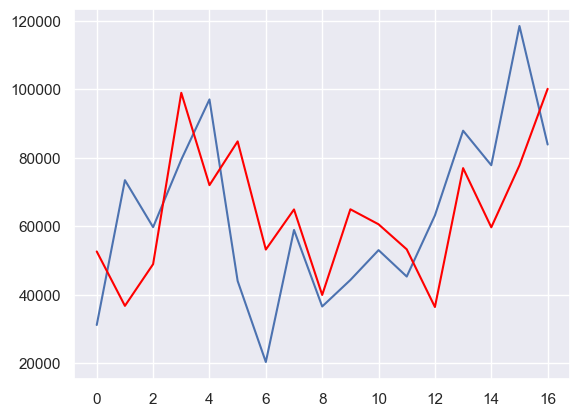

In [215]:
# split into train and test sets

X = sales_series_M.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation

for t in range(len(test)):
 model = ARIMA(history, order=(10,2,2))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
    
# evaluate forecasts

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()